# Introduction to Qiskit 🎉
### Qiskit is a python framework for the simulation of quantum algorithms

In [40]:
from qiskit import QuantumCircuit, QuantumRegister

In [41]:
# Let's define a qubit!
q = QuantumRegister(1,'q')

# We add the qubit 'q' to a Quantum Circuit 'qc'
quantum_circuit = QuantumCircuit(q)

### How to run a circuit?

In [42]:
from qiskit import Aer, execute

In [43]:
try:
    backend_sim = Aer.get_backend('qasm_simulator')
    job = execute(quantum_circuit, backend_sim, shots=1024)
    count = job.result().get_counts()
except Exception:
    print('Something is missing...')

Something is missing...


### Questions
- What did we forget?
- What is the initial value of qubit 'q'?


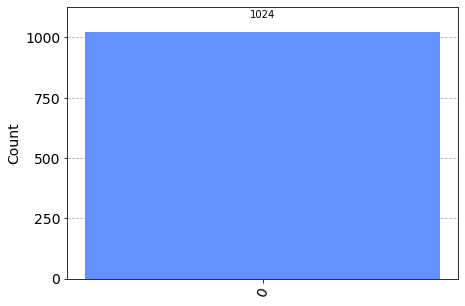

In [44]:
from qiskit import ClassicalRegister
from qiskit.visualization import plot_histogram

# Define qubits and bits
q = QuantumRegister(1,'q')
c_q = ClassicalRegister(1,'c_q')

# Add the qubits and the bits to a quantum circuit
quantum_circuit = QuantumCircuit(q, c_q)

# Add the measurements to your quantum circuit
quantum_circuit.measure(q, c_q) # <---- HERE 

# Execute the quantum circuit
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

### How can we visualize a circuit? 2 ways!
- But first, let's make the things interesting using quantum gates!

In [84]:
from qiskit.circuit.library import XGate


# ------ Define the circuit 
q = QuantumRegister(1,'q')
c_q = ClassicalRegister(1,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

# ------ Add quantum gates to the circuit 
quantum_circuit.append(XGate(), q)

### 1) Matrix representation

In [85]:
from qiskit.quantum_info import Operator

operator = Operator(quantum_circuit)
matrix = operator.data
print(matrix)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


### 2) Circuit representation

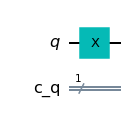

In [86]:
quantum_circuit.draw('mpl')  #or quantum_circuit.draw()

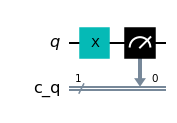

In [87]:
# ------ Add Measurements 
quantum_circuit.measure(q, c_q)

quantum_circuit.draw('mpl')

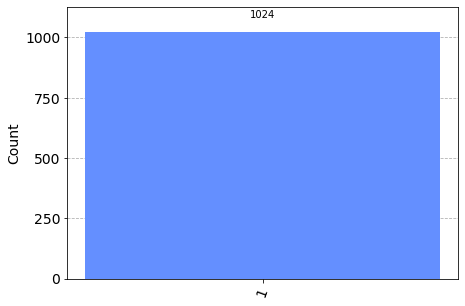

In [88]:
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

## The statevector simulator 

In [103]:
from qiskit.circuit.library import XGate

q = QuantumRegister(1,'q')
c_q = ClassicalRegister(1,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#quantum_circuit.append(XGate(), q)

# ------ Get the statevector  <--- !!! Don't add measurements before
backend_sim = Aer.get_backend('statevector_simulator') # <----- HERE
job = execute(quantum_circuit, backend_sim) 
statevector = job.result().get_statevector() 

print(statevector)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


### Again, let's visualize it!

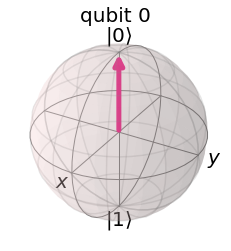

In [104]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(statevector)

# More qubits... ⚛️⚛️

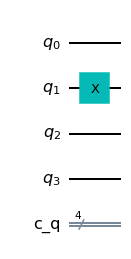

In [130]:
from qiskit.circuit.library import XGate

n_qubits = 4

q = QuantumRegister(n_qubits,'q')
c_q = ClassicalRegister(n_qubits,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------

#NOTE: The XGate is a 1-qubit gate (a 2x2 unitary matrix)
quantum_circuit.append(XGate(), [q[1]]) # <--- list of qubits

#--------------------------------------------

quantum_circuit.draw('mpl')

In [131]:
# ------ Get the statevector
backend_sim = Aer.get_backend('statevector_simulator') # <----- HERE
job = execute(quantum_circuit, backend_sim) 
statevector = job.result().get_statevector() 

print(statevector)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


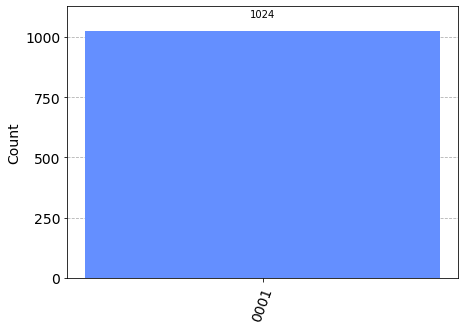

In [129]:
# ------ Get the distribution

quantum_circuit.measure(q, c_q) 

backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

## Take away message: 

Qiskit combines the four quantum bits in the following order:

$$ q[3], q[2], q[1], q[0] .$$

Then, each outcome is read in the same order.

The outcome is a binary number, and so the first digit is expected to be the most significant bit and the last digit is expected to be the least significant bit.

For example, $ 13 =  \mathbf{1} \cdot 2^3 + \mathbf{1} \cdot 2^2 + \mathbf{0} \cdot 2^1 + \mathbf{1} \cdot 2^0 $, which is equal to $ \mathbf{1101} $ in binary.

In this case, $ c_q[3] = 1 $, $ c_q[2] = 1 $, $ c_q[1] = 0 $, and $ c_q[0] = 1$. 

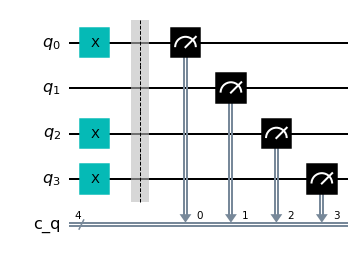

In [136]:
n_qubits = 4

q = QuantumRegister(n_qubits,'q')
c_q = ClassicalRegister(n_qubits,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------

#NOTE: The XGate is a 1-qubit gate (a 2x2 unitary matrix)
quantum_circuit.append(XGate(), [q[0]]) 
quantum_circuit.append(XGate(), [q[2]]) 
quantum_circuit.append(XGate(), [q[3]])

#--------------------------------------------
quantum_circuit.barrier()
quantum_circuit.measure(q, c_q) 

quantum_circuit.draw('mpl')

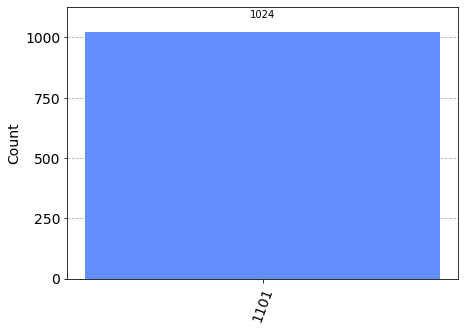

In [134]:
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

# Controlled Gate! 👀

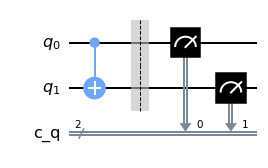

In [142]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------

# Let's define a controlled-XGate (a.k.a. CX, CNOT)

CXGate = XGate().control(1)
quantum_circuit.append(CXGate, [q[0], q[1]]) 

#--------------------------------------------

quantum_circuit.barrier()
quantum_circuit.measure(q, c_q) 

quantum_circuit.draw('mpl')

### What is the result of the previous circuit?

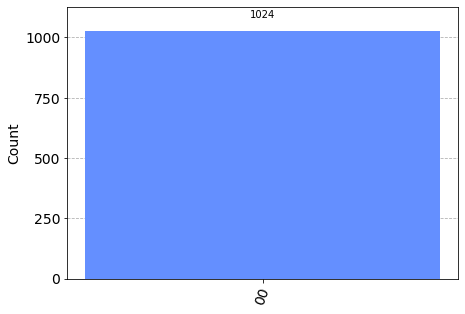

In [143]:
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

## Again! 🔥

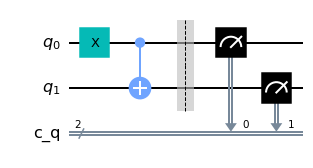

In [144]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#-------- Set q[0] to |1>

quantum_circuit.append(XGate(), [q[0]]) 

#--------------------------------------------

CXGate = XGate().control(1)
quantum_circuit.append(CXGate, [q[0], q[1]]) 

#--------------------------------------------
quantum_circuit.barrier()
quantum_circuit.measure(q, c_q) 

quantum_circuit.draw('mpl')

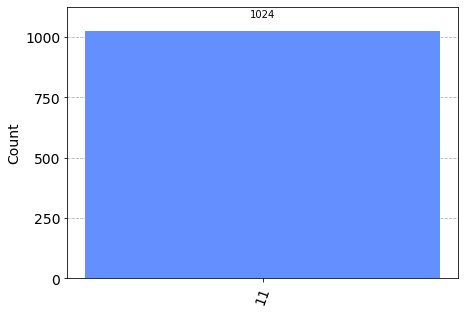

In [145]:
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

# Multi-Controlled Gate! 👀👀

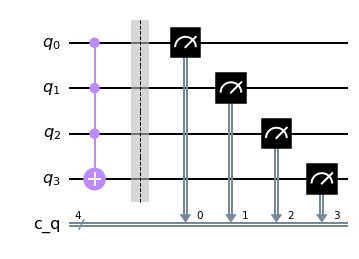

In [156]:
n_qubits = 4
control_qubits = 3

q = QuantumRegister(n_qubits,'q')
c_q = ClassicalRegister(n_qubits,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------
MCXGate = XGate().control(control_qubits)
quantum_circuit.append(MCXGate, [q[0], q[1], q[2], q[3]]) 

#--------------------------------------------
quantum_circuit.barrier()
quantum_circuit.measure(q, c_q) 

quantum_circuit.draw('mpl')

## A wild H Gate appeared! 💥

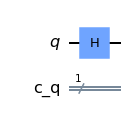

In [170]:
from qiskit.circuit.library import HGate


q = QuantumRegister(1,'q')
c_q = ClassicalRegister(1,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)
quantum_circuit.append(HGate(), [q[0]]) 

quantum_circuit.draw('mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


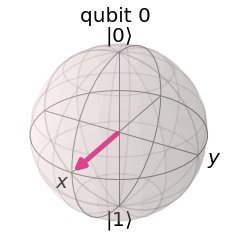

In [171]:
# ------ Get the statevector 
backend_sim = Aer.get_backend('statevector_simulator')
job = execute(quantum_circuit, backend_sim) 
statevector = job.result().get_statevector() 

print(statevector)
plot_bloch_multivector(statevector)

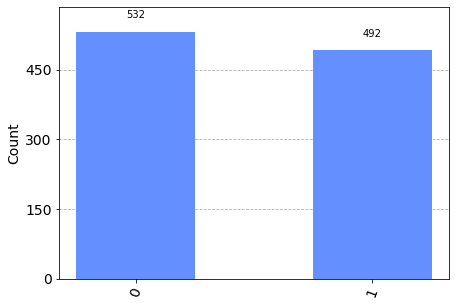

In [172]:
# ------ Get the distribution
quantum_circuit.measure(q, c_q) 

backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

## Every gate can be multi-controlled!

In [1]:
n_qubits = 4
control_qubits = 2

q = QuantumRegister(n_qubits,'q')
c_q = ClassicalRegister(n_qubits,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------
MCHGate = HGate().control(control_qubits)
quantum_circuit.append(MCHGate, [q[0], q[2], q[3]]) 

#--------------------------------------------
quantum_circuit.barrier()
quantum_circuit.measure(q, c_q) 

quantum_circuit.draw('mpl')

NameError: name 'QuantumRegister' is not defined

# Be careful to abstractions...

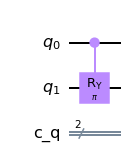

In [196]:
import numpy as np
from qiskit.circuit.library import RYGate

q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------

CRGate = RYGate(np.pi).control(1) #what does it happens if we add 2 controls?
quantum_circuit.append(CRGate, [q[0], q[1]]) 

#--------------------------------------------

quantum_circuit.draw('mpl')

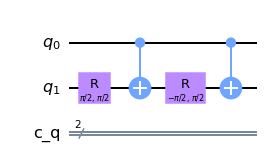

In [197]:
quantum_circuit.decompose(reps=2).draw('mpl')

# Let's Entangle! Bell states

- The Bell's states  are specific quantum states of two qubits that represent the simplest examples of quantum entanglement. 

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$

A quantum state $\ket{e}$ is entangled if there are no two states $\ket{\psi}, \ket{\phi}$ such that $\ket{\psi}\otimes\ket{\phi} = \ket{e}$

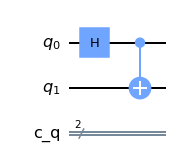

In [208]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------
quantum_circuit.append(HGate(),  [q[0]]) 


CXGate = XGate().control(1) 
quantum_circuit.append(CXGate, [q[0], q[1]]) 

#--------------------------------------------

quantum_circuit.draw('mpl')

In [209]:
# ------ Get the statevector
backend_sim = Aer.get_backend('statevector_simulator')
job = execute(quantum_circuit, backend_sim) 
statevector = job.result().get_statevector() 

print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


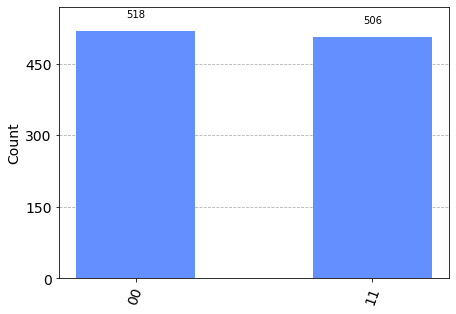

In [210]:
quantum_circuit.measure(q, c_q) 

# ------ Get the distribution
backend_sim = Aer.get_backend('qasm_simulator')
job = execute(quantum_circuit, backend_sim, shots=1024)
counts = job.result().get_counts()

plot_histogram(counts)

## Let's do the same without Qiskit 

In [325]:
I = np.eye(2, dtype=complex)
H = 1/np.sqrt(2)*np.ones([2,2], dtype=complex)
X = np.array([[0,1],[1,0]])

ket0 = np.array([[1],[0]])
bra0 = np.conj(ket0.T)

# |0><0|
print(ket0 * bra0)
print('---------')

ket1 = np.array([[0],[1]])
bra1 = np.conj(ket1.T)

# |1><1|
print(ket1 * bra1)
print('---------')

CX = np.kron(ket0 * bra0, I) + np.kron(ket1 * bra1, X)
print(CX)

[[1 0]
 [0 0]]
---------
[[0 0]
 [0 1]]
---------
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [287]:
# Define a "Bell'state-maker unitary"

HxI = np.kron(H,I)
print(HxI)
bell_maker_unitary = CX.dot(HxI)

[[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]
 [0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]
 [0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]]


In [303]:
#init state
ket00 = np.array([[1],[0],[0],[0]])

bell_state = bell_maker_unitary.dot(ket00)
print(bell_state)

#graph

[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]


In [304]:
# Apply a measurement

base = np.array([[0],[0],[0],[1]])
measurement_11_operator = base*np.conj(base.T)

# <bell_state|Measure11|bell_state>
output = np.conj(bell_state.T).dot(measurement_11_operator).dot(bell_state)
print(output)

[[0.5+0.j]]


# Ok, I prefer Qiskit 😅





# Let's run our quantum algorithm on a REAL quantum computer 🔥

In [313]:
#https://quantum-computing.ibm.com/

TOKEN = '8551206d0a50a352b3113bd26ca9d7d6dfdbae73048cdb4c54aa3820779173ed562b7455004343fd731af37b6084e6bc907f01b80c1d79113461672e40ae9625'

In [314]:
from qiskit import IBMQ

#IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend.status().to_dict()['backend_name'])

ibmqfactory.load_account:WARNING:2023-03-10 00:48:17,171: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_jakarta
ibmq_manila
ibm_lagos
ibm_nairobi
ibm_perth
ibm_oslo


In [316]:
real_device = provider.get_backend('ibm_oslo')

## Let's send to the quantum computer the circuit that creates a Bell's pair

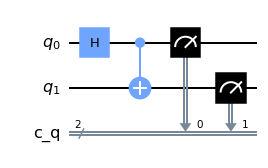

In [318]:
q = QuantumRegister(2,'q')
c_q = ClassicalRegister(2,'c_q')

quantum_circuit = QuantumCircuit(q, c_q)

#--------------------------------------------
quantum_circuit.append(HGate(),  [q[0]]) 

CXGate = XGate().control(1) 
quantum_circuit.append(CXGate, [q[0], q[1]]) 

quantum_circuit.measure(q, c_q) 
#--------------------------------------------

quantum_circuit.draw('mpl')

In [320]:
job = execute(quantum_circuit, backend=real_device, shots=1024)
print(job.job_id())

640a7127b14ec6b717289767


In [322]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [326]:
device_result = job.result()

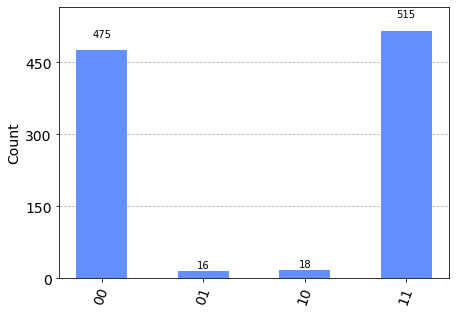

In [324]:
plot_histogram(device_result.get_counts(quantum_circuit))